In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

class Neural_Network(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize=1
        self.hiddenLayerSize=3
        
        #Define Weights
        self.initialW1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.initialW2=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)
        
   

    def forward(self,X):
        #Propagate inputs through network
        self.z2 = np.dot(X,self.initialW1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.initialW2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.forward(X)
        delta3 = np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        delta2=np.dot(delta3,self.initialW2.T)*self.sigmoidPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2
    
        
    

In [3]:
X=np.array(([3,5],[5,1],[10,1]),dtype=float)
y=np.array(([75],[80],[93]),dtype=float)

In [4]:
X


array([[ 3.,  5.],
       [ 5.,  1.],
       [10.,  1.]])

In [5]:
y

array([[75.],
       [80.],
       [93.]])

In [6]:
X=X/np.amax(X,axis=0)
y=y/100

In [7]:
X,y


(array([[0.3, 1. ],
        [0.5, 0.2],
        [1. , 0.2]]),
 array([[0.75],
        [0.8 ],
        [0.93]]))

In [8]:
NN=Neural_Network()

In [9]:
yH=NN.forward(X)

In [10]:
yH

array([[0.83651555],
       [0.80781684],
       [0.83164131]])

In [11]:
y

array([[0.75],
       [0.8 ],
       [0.93]])

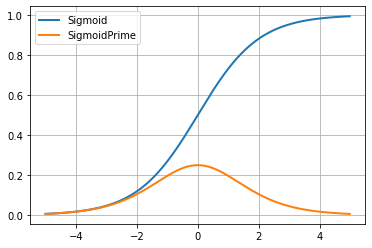

In [12]:
testValues=np.arange(-5,5,0.01)
plt.plot(testValues,NN.sigmoid(testValues),linewidth=2)
plt.plot(testValues, NN.sigmoidPrime(testValues),linewidth=2)
plt.grid(1)
plt.legend(['Sigmoid','SigmoidPrime'])
#u=NN.sigmoidPrime(testValues)


In [13]:
NN=Neural_Network()

In [14]:
cost1=NN.costFunction(X,y)

In [15]:
dJdW1,dJdW2=NN.costFunctionPrime(X,y)

In [16]:
dJdW1

array([[-0.01661579, -0.00462186, -0.00120647],
       [-0.00632427, -0.00178864, -0.00047878]])

In [17]:
dJdW2

array([[-0.0483412 ],
       [-0.05678936],
       [-0.05650543]])

In [20]:
scalar=3
NN.W1 = NN.initialW1+scalar*dJdW1
NN.W2 = NN.initialW2+scalar*dJdW2
cost2 = NN.costFunction(X,y)
print(cost1,cost2)

[0.03729623] [0.03729623]


In [21]:
scalar=3
NN.W1 = NN.W1-scalar*dJdW1
NN.W2 = NN.W2-scalar*dJdW2
cost3 = NN.costFunction(X,y)
print(cost2,cost3)

[0.03729623] [0.03729623]


In [41]:
def q1(X,y):
    scalar = 10
    costHistory = []
    accuracy = 1
    targetAccuracy = .0001
    
    NN.W1 = NN.initialW1
    NN.W2 = NN.initialW2

    while accuracy > targetAccuracy:
        dJdW1,dJdW2=NN.costFunctionPrime(X,y)
    
        NN.W1 = NN.W1-scalar*dJdW1
        NN.W2 = NN.W2-scalar*dJdW2
    
        cost = NN.costFunction(X,y)
        costHistory.append(cost)
        if (len(costHistory) > 1):
            prevHistory = costHistory[len(costHistory) - 2]
            accuracy = np.abs(prevHistory - costHistory[len(costHistory)-1])/costHistory[0]
        
    plt.plot(costHistory)
    print("target accuracy:", targetAccuracy)
    print("iterations:", len(costHistory))
    print("cost:", costHistory[len(costHistory)-1])
    print("accuracy:", accuracy)
    return costHistory

target accuracy: 0.0001
iterations: 2
cost: [0.03729623]
accuracy: [0.]


[array([0.03729623]), array([0.03729623])]

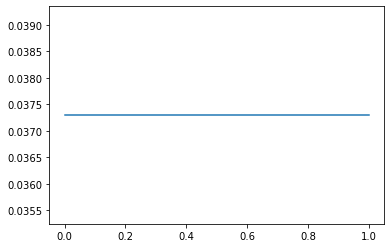

In [42]:
q1(X,y)